In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
#from mlxtend.classifier import StackingClassifier

In [45]:
train_df = pd.read_csv('trainms.csv')
train_df=train_df.drop('treatment',axis=1)
test_df = pd.read_csv('testms.csv')
total_df=pd.concat([train_df,test_df])
total_df.columns

Index(['s.no', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [46]:
total_df.shape

(1259, 27)

In [47]:
total_df.drop(['state'], axis= 1,inplace=True)
total_df.drop(['comments'], axis= 1,inplace=True)
total_df.drop(['s.no'],axis=1,inplace=True)
total_df.drop(['Timestamp'], axis= 1,inplace=True)
total_df.drop(['self_employed'], axis= 1,inplace=True)
total_df.drop(['mental_health_interview'], axis= 1,inplace=True)
total_df.drop(['phys_health_interview'], axis= 1,inplace=True)
backup_df=total_df

In [48]:
total_df

,Age,Gender,Country,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
0,37,Female,United States,No,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,Yes,No
1,44,M,United States,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No
2,32,Male,Canada,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,No,Yes
4,31,Male,United States,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Don't know,No
5,33,Male,United States,Yes,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Don't know,No
6,35,Female,United States,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,Don't know,No
7,39,M,Canada,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No
8,42,Female,United States,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,No
9,23,Male,Canada,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Yes,No


In [51]:
total_df=total_df.reset_index(drop=True)

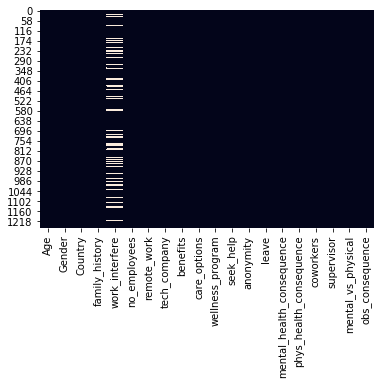

In [52]:
sns.heatmap(total_df.isnull(), cbar=False)

In [53]:
#print(train_df['work_interfere'])
defaultInt = 0
defaultString = 'NaN'

# Create lists by data type
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'family_history', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']

# Clean the NaN's
for feature in total_df:
    if feature in intFeatures:
        total_df[feature] = total_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        total_df[feature] = total_df[feature].fillna(defaultString)

In [54]:

total_df['work_interfere'].replace({'NaN':"Don't know"}, inplace=True)
print(total_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [55]:
gender = total_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = total_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "A little about you", "p", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in total_df.iterrows():

    if str.lower(col.Gender) in male_str:
        total_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        total_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        total_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
# stk_list = ['A little about you', 'p']
# total_df = total_df[~total_df['Gender'].isin(stk_list)]


In [57]:
total_df['Gender'].replace({'A little about you':'trans'},inplace=True)

In [58]:
total_df.Gender.unique()

array(['female', 'male', 'trans'], dtype=object)

In [59]:
total_df['Age'].fillna(total_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(total_df['Age'])
s[s<0]=0
s[s<18] = total_df['Age'].median()
total_df['Age'] = s
s = pd.Series(total_df['Age'])
s[s>120] = total_df['Age'].median()
total_df['Age'] = s

#Ranges of Age
total_df['age_range'] = pd.cut(total_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [60]:
total_df['Age'].nunique()

45

In [169]:
labelDict = {}
for feature in total_df:
    le = preprocessing.LabelEncoder()
    le.fit(total_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    total_df[feature] = le.transform(total_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():     
    print(key, value)

# #Get rid of 'Country'
# total_df = total_df.drop(['Country'], axis= 1)
# total_df.head()

label_mental_health_consequence [0, 1, 2]
label_work_interfere [0, 1, 2, 3, 4]
label_Gender [0, 1, 2]
label_benefits [0, 1, 2]
label_Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
label_tech_company [0, 1]
label_anonymity [0, 1, 2]
label_wellness_program [0, 1, 2]
label_no_employees [0, 1, 2, 3, 4, 5]
label_supervisor [0, 1, 2]
label_phys_health_consequence [0, 1, 2]
label_mental_vs_physical [0, 1, 2]
label_obs_consequence [0, 1]
label_family_history [0, 1]
label_coworkers [0, 1, 2]
label_age_range [0, 1, 2, 3]
label_remote_work [0, 1]
label_care_options [0, 1, 2]
label_seek_help [0, 1, 2]
label_leave [0, 1, 2, 3, 4]


In [62]:
X_test = total_df[1000:]
X_train_val = total_df[:1000]

In [63]:
X_train_val.shape

(1000, 20)

In [64]:
X_test.shape

(259, 20)

In [65]:
total_df.shape

(1259, 20)

In [66]:
Y = pd.read_csv('trainms.csv').treatment


In [67]:
Y.shape

(1000,)

In [21]:
# import pickle
# scalerfile = 'scaler.sav'
# scaler = pickle.load(open(scalerfile, 'rb'))
# test_scaled_set = scaler.transform(test_set)

In [30]:
for key, value in labelDict.items():     
    print(key, value)

label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_work_interfere ['Sometimes', 'Rarely', "Don't know", 'Never', 'Often']
label_mental_vs_physical ['No', "Don't know", 'Yes']
label_Gender ['female', 'trans', 'A little about you', 'male']
label_benefits ['No', "Don't know", 'Yes']
label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_tech_company ['No', 'Yes']
label_anonymity ['No', "Don't know", 'Yes']
label_no_employees ['500-1000', 'More than 1000', '100-500', '6-25', '1-5', '26-100']
label_wellness_program ['No', "Don't know", 'Yes']
label_supervisor ['No', 'Some of them', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_Country ['Slovenia', 'India', 'Russia', 'Switzerland', 'United States', 'Denmark', 'Israel', 'Brazil', 'Finland', 'Ireland', 'Italy', 'Costa Rica', 'Mexico', 'Latvia', 'Zimbabwe', 'Portugal', 'Polan

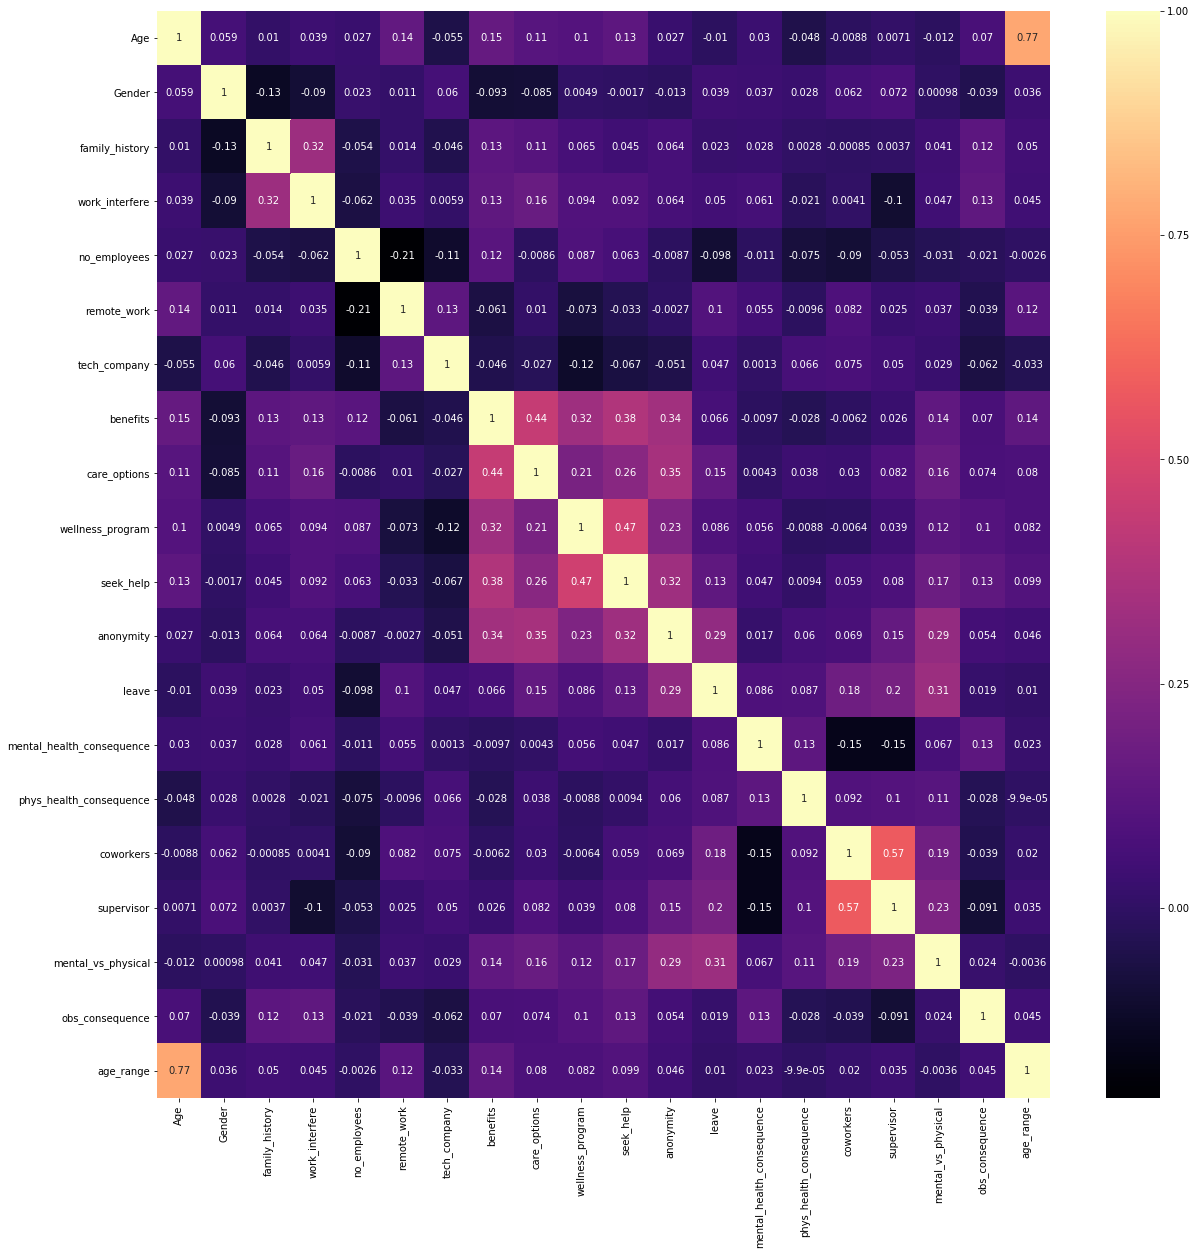

In [68]:
corrmat = total_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(total_df[top_corr_features].corr(),annot=True,cmap="magma")

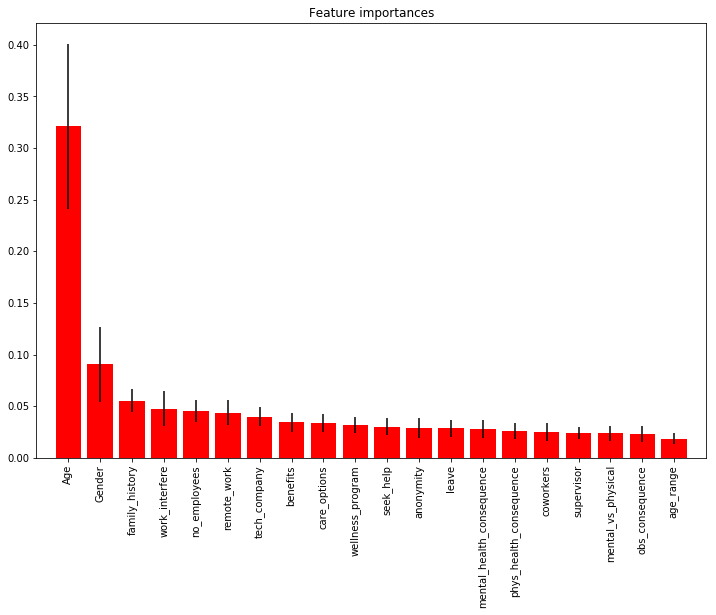

In [69]:
X  = X_train_val
y = Y
feature_cols = list(X.columns)
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [70]:
#feature selection using heatmap covariance and extra tree classification
f= ['work_interfere',
       'remote_work', 'care_options',
       'wellness_program', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence',
       'supervisor', 'mental_vs_physical', 'obs_consequence', 'Age','Gender','family_history','tech_company', 'benefits','no_employees','seek_help']

In [71]:
X_train_val = X_train_val[f]
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y,test_size=0.2)

In [72]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [73]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [74]:
X_test = X_test[f]

In [75]:
X_test = scaler.transform(X_test)

# Logistic Regression

In [109]:
def logisticRegression():
    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_val)
    
    print('########### Logistic Regression ###############')
    print(classification_report(Y_val, y_pred_class)) 
    print(confusion_matrix(Y_val, y_pred_class))
    print(accuracy_score(Y_val, y_pred_class))
    return (logreg)
model = logisticRegression()

########### Logistic Regression ###############
             precision    recall  f1-score   support

         No       0.83      0.79      0.81       100
        Yes       0.80      0.84      0.82       100

avg / total       0.82      0.81      0.81       200

[[79 21]
 [16 84]]
0.815


In [137]:
predict = model.predict(X_test)

In [138]:
# results = np.argmax(resultsAdam,axis=1)
results = pd.Series(predict,name="treatment")

In [139]:
submission = pd.concat([pd.Series(range(1,260),name = "s.no"),results],axis = 1)

In [140]:
submission.to_csv("submission.csv",index=False)

In [141]:
y_tr = model.predict(X_train)
print(accuracy_score(Y_train, y_tr))

0.8375


In [142]:
model_file = 'random.pkl'
pickle.dump(model, open(model_file, 'wb'))

In [143]:
m = pickle.load(open(model_file, 'rb'))

In [52]:
##checkpoint --- 1. Model trained

# Decision Tree

In [84]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)
# tuningRandomizedSearchCV(tree,param_dist)

In [85]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
treeClassifier()

Rand. Best Score:  0.835
Rand. Best Params:  {'max_features': 18, 'max_depth': 3, 'min_samples_leaf': 2, 'criterion': 'gini', 'min_samples_split': 3}
[0.835, 0.835, 0.835, 0.835, 0.79, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835]


In [117]:
#AFTER RANDOMIZED CV HYPERTUNING
def randomizedecision():
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=3, max_features=18, criterion='gini', min_samples_leaf=2)
    tree.fit(X_train, Y_train)
        # make class predictions for the testing set
    y_pred_class = tree.predict(X_val)
    print('########### Tree classifier ###############')
    print(classification_report(Y_val, y_pred_class)) 
    print(confusion_matrix(Y_val, y_pred_class))
    print(accuracy_score(Y_val, y_pred_class))
    return(tree)
model = randomizedecision()

########### Tree classifier ###############
             precision    recall  f1-score   support

         No       0.90      0.75      0.82       100
        Yes       0.79      0.92      0.85       100

avg / total       0.84      0.83      0.83       200

[[75 25]
 [ 8 92]]
0.835


# ADA Boosting

In [88]:
def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, Y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_val)
    
    print('########### Boosting ###############')
    print(classification_report(Y_val, y_pred_class)) 
    print(confusion_matrix(Y_val, y_pred_class))
    print(accuracy_score(Y_val, y_pred_class))
    return boost
model = boosting()

########### Boosting ###############
             precision    recall  f1-score   support

         No       0.80      0.82      0.81       110
        Yes       0.77      0.74      0.76        90

avg / total       0.78      0.79      0.78       200

[[90 20]
 [23 67]]
0.785


# Random Forest

In [135]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [4, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
randomForest()

Rand. Best Score:  0.84
Rand. Best Params:  {'max_features': 6, 'max_depth': 4, 'min_samples_leaf': 4, 'criterion': 'gini', 'min_samples_split': 7}


KeyboardInterrupt: 

In [136]:
def randomizedrandomForest():
    
    forest = RandomForestClassifier(max_features=6, max_depth = 4, min_samples_leaf=4, min_samples_split=7, n_estimators = 20, criterion='gini')
    my_forest = forest.fit(X_train, Y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_val)
    
    print('########### Random Forests ###############')
    print(classification_report(Y_val, y_pred_class)) 
    print(confusion_matrix(Y_val, y_pred_class))
    print(accuracy_score(Y_val, y_pred_class))
    return forest
model = randomizedrandomForest()

########### Random Forests ###############
             precision    recall  f1-score   support

         No       0.90      0.75      0.82       100
        Yes       0.79      0.92      0.85       100

avg / total       0.84      0.83      0.83       200

[[75 25]
 [ 8 92]]
0.835


# KNeighbours

In [125]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier()
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
Knn()

Rand. Best Score:  0.8
Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 12}


KeyboardInterrupt: 

In [127]:
def RandomizedKnn():
    
    knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
    knn.fit(X_train, Y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_val)
    
    print('########### KNeighborsClassifier ###############')
    print(classification_report(Y_val, y_pred_class)) 
    print(confusion_matrix(Y_val, y_pred_class))
    print(accuracy_score(Y_val, y_pred_class))
    return knn
model = RandomizedKnn()

########### KNeighborsClassifier ###############
             precision    recall  f1-score   support

         No       0.76      0.78      0.77       100
        Yes       0.78      0.76      0.77       100

avg / total       0.77      0.77      0.77       200

[[78 22]
 [24 76]]
0.77


# Gradient Boosting

In [156]:
def gradboosting():
    gb_clf = GradientBoostingClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [4, None],
                  "max_features": randint(1, featuresSize),
                  "n_estimators": randint(15,25)}
    tuningRandomizedSearchCV(gb_clf, param_dist)
    #gb_clf.fit(X_train, y_train)
gradboosting()

Rand. Best Score:  0.829
Rand. Best Params:  {'max_features': 11, 'n_estimators': 23, 'max_depth': 4}


KeyboardInterrupt: 

In [149]:
def Randomizedgrad():
    
    gb_clf = GradientBoostingClassifier(learning_rate=0.005,n_estimators=23, max_features=11, max_depth=4)
    gb_clf.fit(X_train,Y_train)
    y_pred_class = gb_clf.predict(X_val)
    
    print('########### KNeighborsClassifier ###############')
    print(classification_report(Y_val, y_pred_class)) 
    print(confusion_matrix(Y_val, y_pred_class))
    print(accuracy_score(Y_val, y_pred_class))
    return gb_clf
model = Randomizedgrad()

########### KNeighborsClassifier ###############
             precision    recall  f1-score   support

         No       0.80      0.80      0.80       100
        Yes       0.80      0.80      0.80       100

avg / total       0.80      0.80      0.80       200

[[80 20]
 [20 80]]
0.8
